In [1]:
%cd ..

/Users/erwan/Programmes/2022 Datacamp/solar_wind


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from display import plot_event, multiple_plots, show_densities, display_timeline
from problem import get_train_data
from problem import turn_prediction_to_event_list

In [17]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)
no_events = turn_prediction_to_event_list(labels_train == 0)

- Corrélation Beta - Vth d'après spearman : __0.525744__

In [18]:
var_name = 'Vth'
df = data_train[[var_name]].copy()
df['label'] = labels_train.copy()

var_s = data_train[var_name].copy()

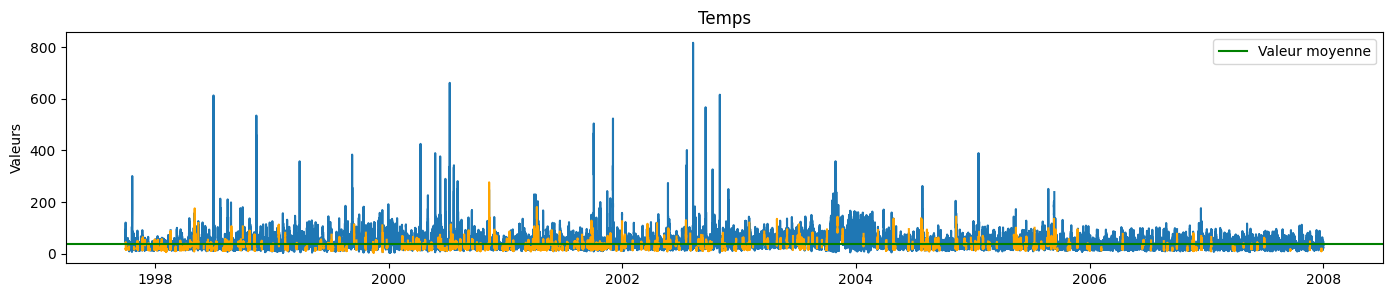

In [19]:
display_timeline(var_s, labels_train)

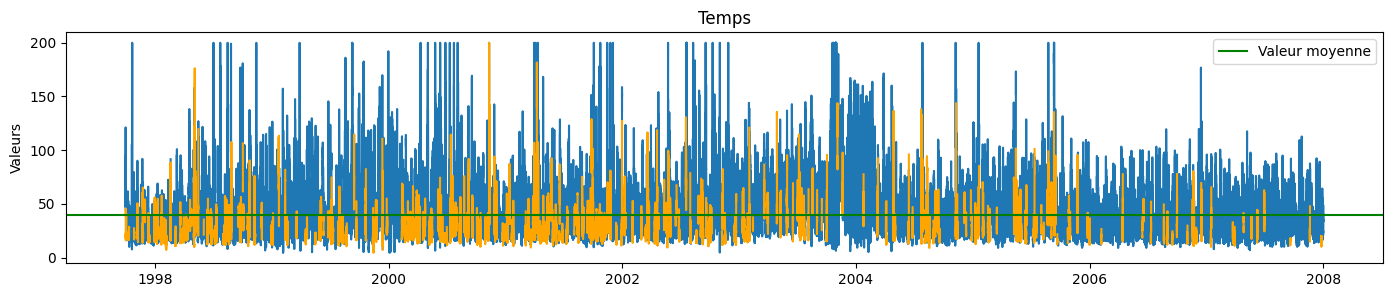

In [27]:
thresh_var_s = var_s.map(lambda x: min(x, 200))
thresh_var_df = thresh_var_s.to_frame()
thresh_var_df['label'] = labels_train.copy()

display_timeline(thresh_var_s, labels_train)

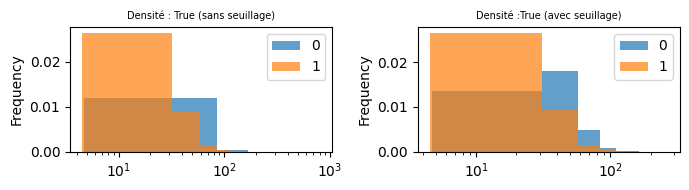

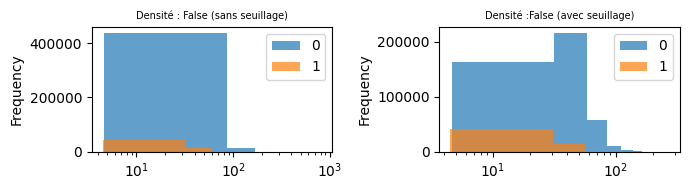

In [21]:
show_densities(df, thresh_var_df)

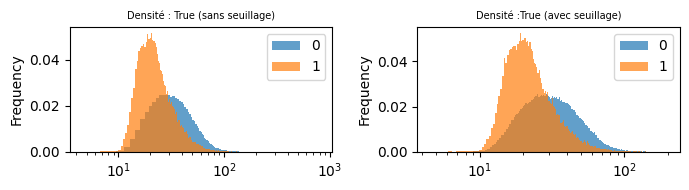

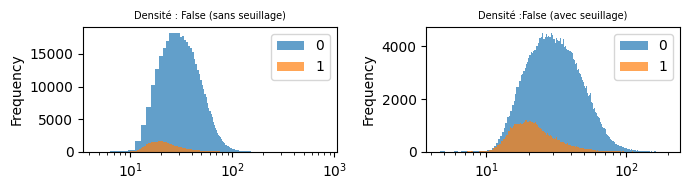

In [28]:
for density in [True, False]:
    _, ax = plt.subplots(ncols=2, figsize=(7, 2))
    ax[0].set_title("Densité : " + str(density) + " (sans seuillage)", fontsize=7)
    ax[1].set_title("Densité :" + str(density)+ " (avec seuillage)", fontsize=7)

    df.groupby(['label'])[var_name].plot(kind='hist', bins=500, alpha=0.7, ax=ax[0], legend=True, density=density, logx=True)
    thresh_var_df.groupby(['label'])[var_name].plot(kind='hist', bins=500, alpha=0.7, ax=ax[1], legend=True, density=density, logx=True,)
    plt.tight_layout()

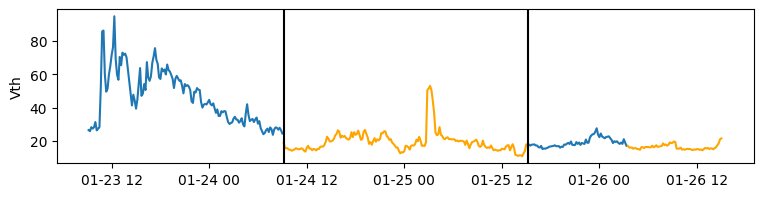

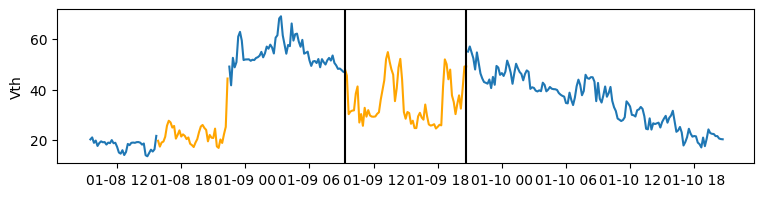

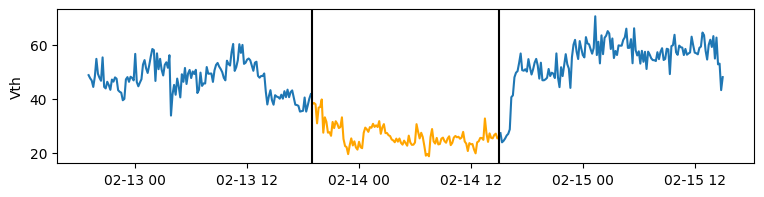

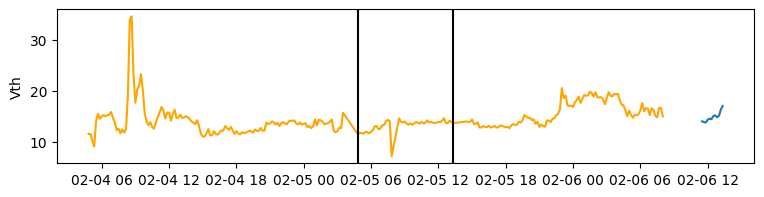

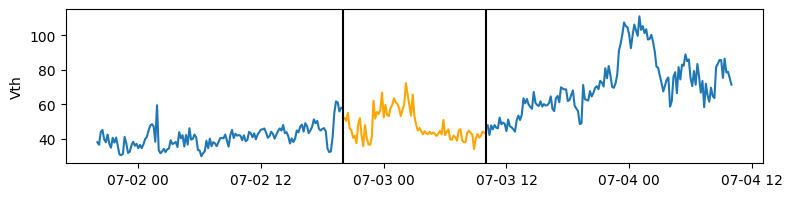

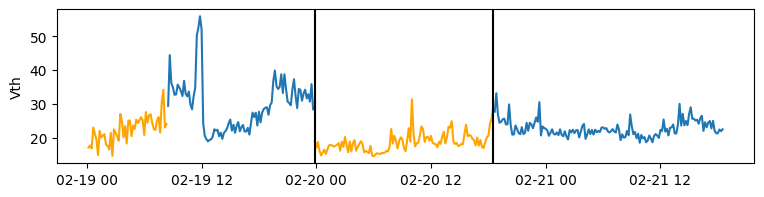

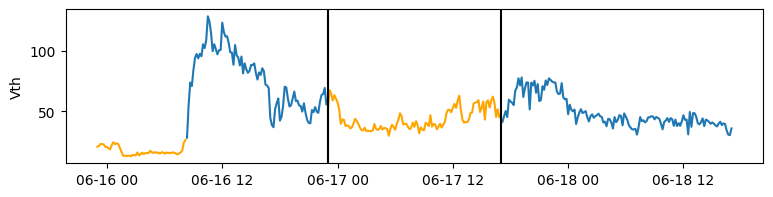

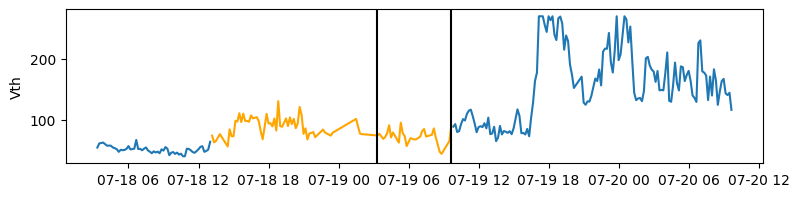

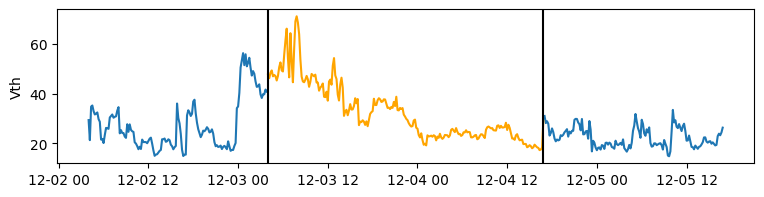

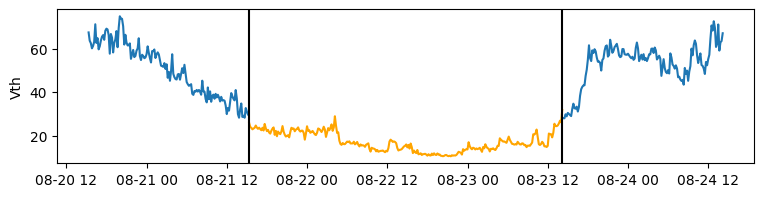

In [23]:
multiple_plots(
    thresh_var_s.to_frame(), 
    labels_train, 
    events=events,
    n_events=10,
    delta=24,
    figsize=(9, 2),
    random_state=2
    )

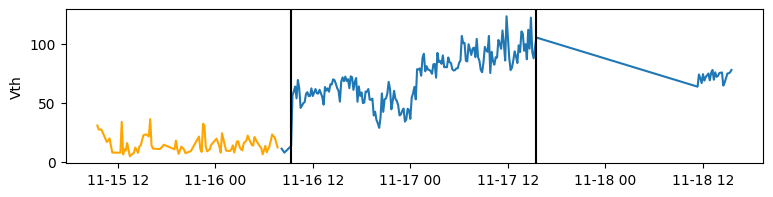

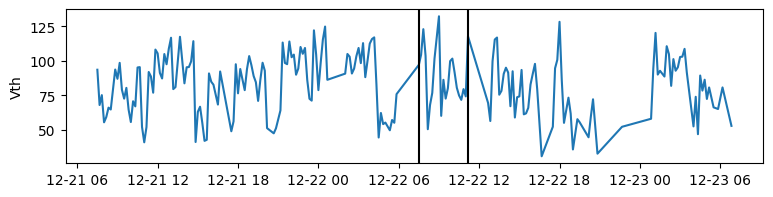

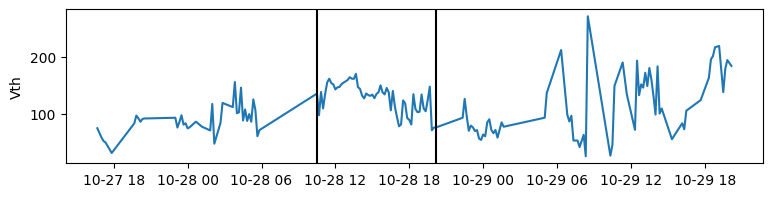

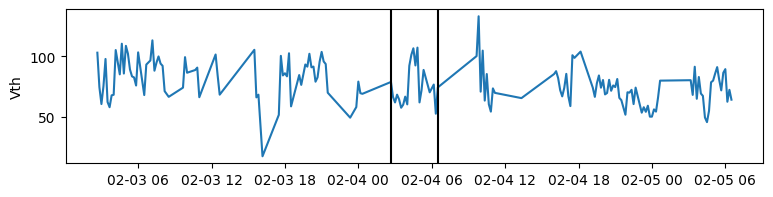

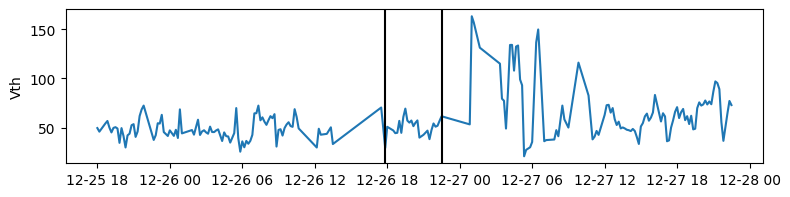

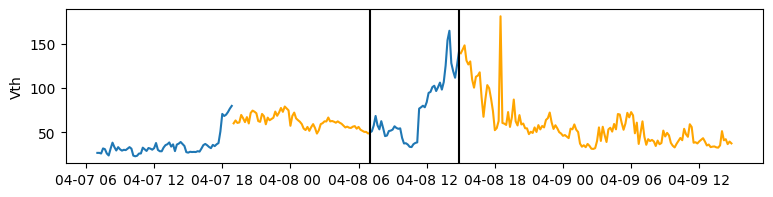

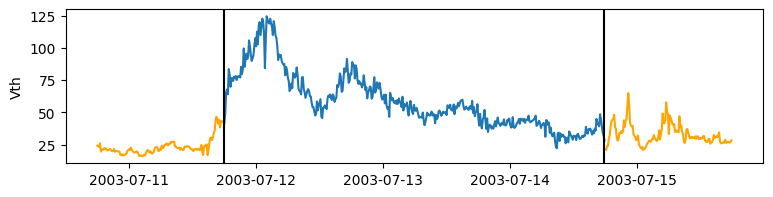

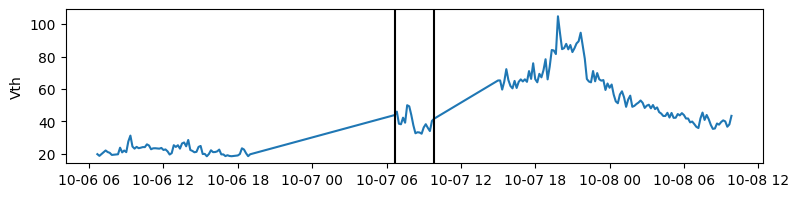

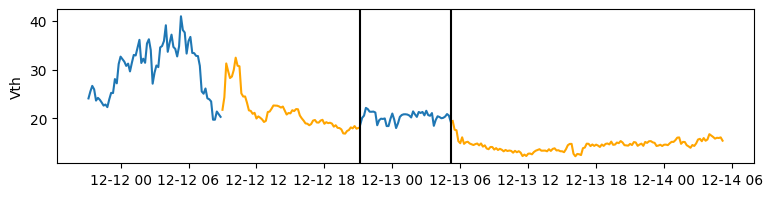

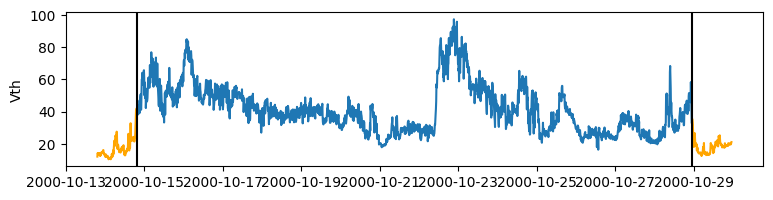

In [24]:
multiple_plots(
    thresh_var_s.to_frame(), 
    labels_train, 
    events=no_events,
    n_events=10,
    delta=24,
    figsize=(9, 2),
    random_state=2
    )

Un écart de 100 (tendance vers les petites valeurs) lorsqu'une tempête se produit)